# Credit Card Customer Segmentation Case Study

# Contents:
------------------------
-  . <a href = #link100>Context:</a>
- 1. <a href = #link1>Importing Libraries</a>
- 2. <a href = #link2>Reading and Review of the dataset.</a>
- 3. <a href = #link3>Transposing index and columns</a>
- 4. <a href = #link4>EDA Discriptive Observations</a>
- 5. <a href = #link5>Checking for error, duplicates and missing vales</a>
- 6. <a href = #link6>Univariate analysis</a>
- 7. <a href = #link7>MultiVariate Analysis.</a>
- 8. <a href = #link8> Bi-variate analysis.</a>
- 9. <a href = #link9>K-Means Clustering.</a>
- 10. <a href = #link10>Hierarchial Clustering</a>
- 11. <a href = #link11>Principal Component Analysis (PCA).</a>
- 12. <a href = #link12>Silhouette Coefficient.</a>
- 13. <a href = #link13>Conclusion.</a>
- 14. <a href = #link14>References & GitHub Link.</a>
    



# <a id='link100'> Context:</a>

AllLife Credit Card Customer Segmentation
Background: AllLife Bank wants to focus on its credit card customer base in the next 
financial year. They have been advised by their marketing research team, that the 
penetration in the market can be improved. Based on this input, the Marketing team 
proposes to run personalised campaigns to target new customers as well as upsell to 
existing customers. Another insight from the market research was that the customers 
perceive the support services of the back poorly. Based on this, the Operations team 
wants to upgrade the service delivery model, to ensure that customers queries are 
resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the 
Data Science team for help.

Objective: To identify different segments in the existing customer based on their 
spending patterns as well as past interaction with the bank. 
Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and 
service these customers?
Data Description:
 Data is of various customers of a bank with their credit limit, the total number of credit 
cards the customer has, and different channels through which customer has 
contacted the bank for any queries, different channels include visiting the bank, 
online and through a call centre. 

# Metrics
Unlike supervised Machine Learning algorithms, unsupervised clustering does not have clearly defined metrics for the optimal parameters, or number of clusters. Below, I will use the K-means clustering-hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot- elbow method and silhouette coefficient to validate the clustering algorithm’s performance, and choose the best number of segments for our data.

# Environment and Algorithms techniques.
* scikit-learn
* seaborn
* numpy
* pandas
* matplotlib
* scipy.stats
* sklearn.cluster- KMeans
* sklearn.preprocessing
* sklearn.linear_model 
* sklearn.decomposition
* mpl_toolkits.mplot3d
* scipy.cluster.hierarchy - cophenet, dendrogram, linkage
* scipy.spatial.distance
* sklearn.metrics- silhouette_score


# <a id='link1'> Importing Libraries</a>

In [111]:
# The following code to importing libraries

import pandas as pd
import numpy as np

# The following code to importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The following code to Ignore warnings 
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy import stats 

# center and scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
# Let us try with K = 3 (to demonstrate the 3d plot using mplot3d)
from mpl_toolkits.mplot3d import Axes3D

# <a id='link2'> Reading and Review of the dataset.</a>

In [112]:
credit = pd.read_csv('Credit Card Customer Data.csv').copy()

In [113]:
credit.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


# <a id='link3'>Transposing index and columns</a>

In [114]:
# The following line of code to print dataset shape.
credit.shape

(660, 7)

In [115]:
#The following line of code to print dataset info.
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [116]:
# The following line of code to print dataset columns.
credit.columns


Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [117]:
# The following line of code to print data types.
credit.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [118]:
# The following line of code to print nunique values.
n_unique = credit.nunique()
print('Number of unique values:\n{}'.format(n_unique))

Number of unique values:
Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64


In [9]:
# To count and print of continuous variable.
continuous_variables=[col for col in credit.columns if credit[col].nunique()>5]
print(continuous_variables)

['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']


# <a id='link4'>EDA Discriptive Observations</a>

In [10]:
# The following line of code to describe the dataset.
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [11]:
# Printing the mean of dataset distribution.
credit.mean()

Sl_No                    330.500000
Customer Key           55141.443939
Avg_Credit_Limit       34574.242424
Total_Credit_Cards         4.706061
Total_visits_bank          2.403030
Total_visits_online        2.606061
Total_calls_made           3.583333
dtype: float64

In [12]:
# Printing the median of dataset distribution.
credit.median()

Sl_No                    330.5
Customer Key           53874.5
Avg_Credit_Limit       18000.0
Total_Credit_Cards         5.0
Total_visits_bank          2.0
Total_visits_online        2.0
Total_calls_made           3.0
dtype: float64

In [13]:
# Printing the Std of dataset distribution.
credit.std()

Sl_No                    190.669872
Customer Key           25627.772200
Avg_Credit_Limit       37625.487804
Total_Credit_Cards         2.167835
Total_visits_bank          1.631813
Total_visits_online        2.935724
Total_calls_made           2.865317
dtype: float64

In [14]:
# Printing the skew of dataset distribution.
credit.skew()

Sl_No                  0.000000
Customer Key           0.051462
Avg_Credit_Limit       2.202396
Total_Credit_Cards     0.144879
Total_visits_bank      0.141896
Total_visits_online    2.225607
Total_calls_made       0.658905
dtype: float64

In [15]:
# The following line of code to describe avg_credt_card of dataset distribution.
credit['Avg_Credit_Limit'].describe()

count       660.000000
mean      34574.242424
std       37625.487804
min        3000.000000
25%       10000.000000
50%       18000.000000
75%       48000.000000
max      200000.000000
Name: Avg_Credit_Limit, dtype: float64

In [17]:
# The following line of code to describe Total_Credit_Cards of dataset distribution.
credit['Total_Credit_Cards'].describe()

count    660.000000
mean       4.706061
std        2.167835
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       10.000000
Name: Total_Credit_Cards, dtype: float64

In [18]:
import statistics

In [19]:
# The following line of code to print the ststistics of the dataset distribution.
for i in ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']:
    print(statistics.mode(credit[i]))

8000
4
2
2
4


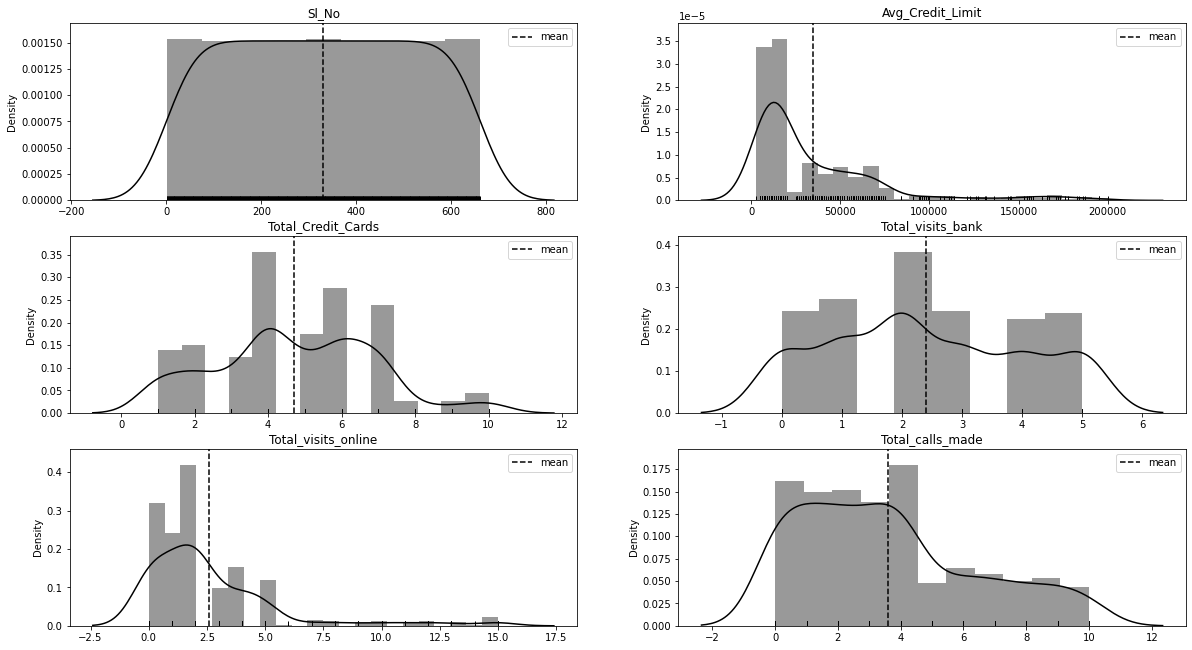

In [119]:
# The following line of code to to visualize the dataset independent variables.
import itertools
cols = [i for i in credit.columns if i != 'Customer Key']
fig = plt.figure(figsize=(20,15))
for i,j in itertools.zip_longest(cols, range(len(cols))):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(credit[i],color='black',rug=True)
    plt.axvline(credit[i].mean(),linestyle='dashed',label='mean', color='black')
    plt.legend()
    plt.title(i)
    plt.xlabel("")

# Observation.
The subplots show there are normal distributions on the dataset customer key columns which cannot be considered as important as it is an entry index only. But by looking at other attributes on the dataset is normal distribution on the Total_visits_bank, there is a right skew on the average credit limit (Avg_Credit_bank) and total online visits (Total_visits_online) this an indication of having outliers. But it is different from the bank visits its shows normal distributions.  

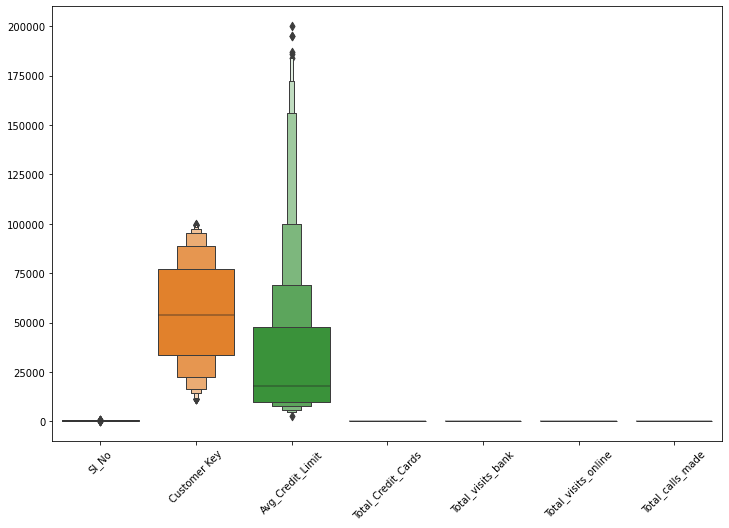

In [120]:
# Following the line of codes to visualize the outliers by using boxplot.
plt.subplots(figsize=(12,8))
ax = sns.boxenplot(data=credit)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Observation.
The boxplot shows that there is a few outliers On the avrage credit limit.

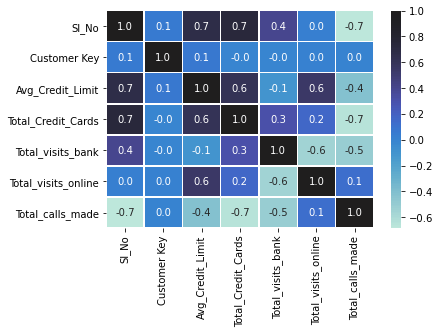

<Figure size 864x576 with 0 Axes>

In [121]:
# The following code to plots heatmap.
sns.heatmap(credit.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 ) 
plt.figure(figsize=(12, 8))
plt.show() 

# Observation.
The heatmap indicates there is a slight correlation between the dataset attributes.

In [122]:
# The following line of code to print dataset correlation.
credit.corr(method='kendall')


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,1.000000,0.035219,0.511875,0.555316,0.301461,-0.261829,-0.483440
Customer Key,0.035219,1.000000,0.048772,-0.005471,-0.002259,0.005778,-0.000494
Avg_Credit_Limit,0.511875,0.048772,1.000000,0.393034,0.082167,-0.078739,-0.326996
Total_Credit_Cards,0.555316,-0.005471,0.393034,1.000000,0.296640,-0.242907,-0.492532
Total_visits_bank,0.301461,-0.002259,0.082167,0.296640,1.000000,-0.512982,-0.373968
Total_visits_online,-0.261829,0.005778,-0.078739,-0.242907,-0.512982,1.000000,0.310855
Total_calls_made,-0.483440,-0.000494,-0.326996,-0.492532,-0.373968,0.310855,1.000000


# Observation.

* Total online visits has a slight correlation with credit cards.

* Avg_Credit_Limit has mailed correlation with total visits.

* Total call made might have a correlation with bank visits.

* A big number of credit cards with less credit limit.

In [123]:
# Print dataset numerical variables.
num_var=list(credit.select_dtypes(exclude='object').columns)
credit[num_var]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


# Identifying Outliers with interquartile Range (IQR)
By calculating the differences between the 75th and 25th percentiles. it is represented by the formula IQR = Q3 - Q1. The lines of code below calculate and print the inequalities range for each of the variables in the dataset.

In [126]:
# The following line of code to calculate the interquartile range (IQR). 
# Note: If the following code didn't run please run the second row and repeat this code it will run.
from scipy import stats 
Q1 = credit.quantile(0.25)
Q2 = credit.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Sl_No                  47834.25
Customer Key           14174.75
Avg_Credit_Limit       38000.00
Total_Credit_Cards     47997.00
Total_visits_bank      47999.00
Total_visits_online    47999.00
Total_calls_made       47999.00
Name: 0.25, dtype: float64


In [127]:
# The following line of code to print Quartiles.
Q1=credit['Avg_Credit_Limit'].quantile(q=0.25)
Q3=credit['Avg_Credit_Limit'].quantile(q=0.75)
print('1st Quartile (Q1)is:', Q1)
print('3rd Quartile (Q3)is:', Q3)
print('interquartile range (IQR)is', stats.iqr(credit['Avg_Credit_Limit']))

1st Quartile (Q1)is: 10000.0
3rd Quartile (Q3)is: 48000.0
interquartile range (IQR)is 38000.0


In [128]:
# The following line of code to print Quartiles.
Q1=credit['Total_Credit_Cards'].quantile(q=0.25)
Q3=credit['Total_Credit_Cards'].quantile(q=0.75)
print('1st Quartile (Q1)is:', Q1)
print('3rd Quartile (Q3)is:', Q3)
print('interquartile range (IQR)is', stats.iqr(credit['Total_Credit_Cards']))

1st Quartile (Q1)is: 3.0
3rd Quartile (Q3)is: 6.0
interquartile range (IQR)is 3.0


In [129]:
# The following line of code to print Quartiles.
Q1=credit['Total_visits_bank'].quantile(q=0.25)
Q3=credit['Total_visits_bank'].quantile(q=0.75)
print('1st Quartile (Q1)is:', Q1)
print('3rd Quartile (Q3)is:', Q3)
print('interquartile range (IQR)is', stats.iqr(credit['Total_visits_bank']))

1st Quartile (Q1)is: 1.0
3rd Quartile (Q3)is: 4.0
interquartile range (IQR)is 3.0


In [130]:
# The following line of code to print Quartiles.
Q1=credit['Total_visits_online'].quantile(q=0.25)
Q3=credit['Total_visits_online'].quantile(q=0.75)
print('1st Quartile (Q1)is:', Q1)
print('3rd Quartile (Q3)is:', Q3)
print('interquartile range (IQR)is', stats.iqr(credit['Total_visits_online']))

1st Quartile (Q1)is: 1.0
3rd Quartile (Q3)is: 4.0
interquartile range (IQR)is 3.0


In [131]:
# The following line of code to print Quartiles.
Q1=credit['Total_calls_made'].quantile(q=0.25)
Q3=credit['Total_calls_made'].quantile(q=0.75)
print('1st Quartile (Q1)is:', Q1)
print('3rd Quartile (Q3)is:', Q3)
print('interquartile range (IQR)is', stats.iqr(credit['Total_calls_made']))

1st Quartile (Q1)is: 1.0
3rd Quartile (Q3)is: 5.0
interquartile range (IQR)is 4.0


## Calculating total outliers on each dataset attributes.

In [132]:
print('Outliers in Avg_Credit_Limit:',credit[((credit.Avg_Credit_Limit - credit.Avg_Credit_Limit.mean()) / credit.Avg_Credit_Limit.std()).abs() >3]['Avg_Credit_Limit'].count())
print('Outliers in Total_Credit_Cards: ',credit[((credit.Total_Credit_Cards - credit.Total_Credit_Cards.mean()) /credit.Total_Credit_Cards.std()).abs() >3]['Total_Credit_Cards'].count())
print('Outliers in Total_visits_bank: ',credit[((credit.Total_visits_bank - credit.Total_visits_bank.mean()) / credit.Total_visits_bank.std()).abs() >3]['Total_visits_bank'].count())
print('Outliers in Total_visits_online: ',credit[((credit.Total_visits_online - credit.Total_visits_online.mean()) / credit.Total_visits_online.std()).abs() >3]['Total_visits_online'].count())
print('Outliers in Total_calls_made: ',credit[((credit.Total_calls_made - credit.Total_calls_made.mean()) / credit.Total_calls_made.std()).abs() >3]['Total_calls_made'].count())

Outliers in Avg_Credit_Limit: 24
Outliers in Total_Credit_Cards:  0
Outliers in Total_visits_bank:  0
Outliers in Total_visits_online:  22
Outliers in Total_calls_made:  0


# Observation.
there are outliers few in Outliers in Avg_Credit_Limit: 24 and Outliers in Total_visits_online:  22.

# <a id='link6'>Univariate Analysis.</a>

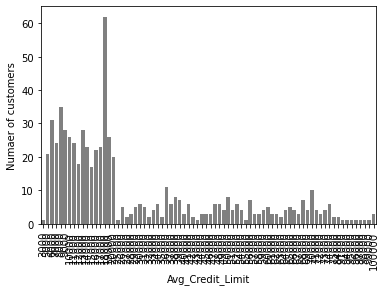

In [37]:
# the following line of code to plot Avg_Credit_Limit.
sns.countplot(credit['Avg_Credit_Limit'],color='gray')
plt.xticks(rotation=90)
plt.ylabel('Numaer of customers')
plt.show()

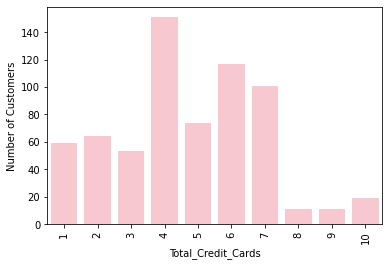

In [38]:
# The following line of code to plots Total_Credit_Cards.
sns.countplot(credit['Total_Credit_Cards'],color='pink')
plt.xticks(rotation=90)
plt.ylabel('Number of Customers')
plt.show()

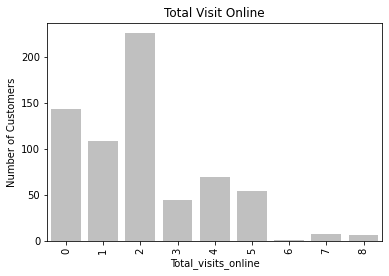

In [39]:
# The following code to plots Total_visits_online.
sns.countplot(credit['Total_visits_online'],color='silver')
plt.title('Total Visit Online')
plt.xticks(rotation=90)
plt.ylabel('Number of Customers')
plt.show()

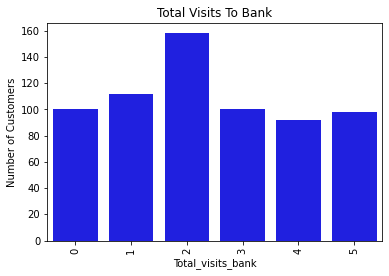

In [40]:
# The following line of code to plots Total_visits_bank.
sns.countplot(credit['Total_visits_bank'],color='blue')
plt.title('Total Visits To Bank')
plt.xticks(rotation=90)
plt.ylabel('Number of Customers')
plt.show()

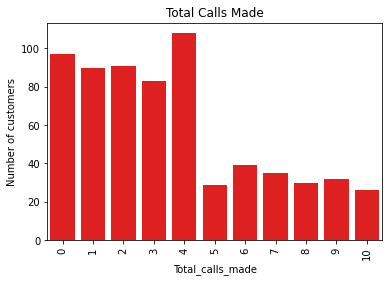

In [41]:
# The following line of code plots total cals made.
sns.countplot(credit['Total_calls_made'],color='red')
plt.title('Total Calls Made')
plt.xticks(rotation=90)
plt.ylabel('Number of customers')
plt.show()

<AxesSubplot:xlabel='Avg_Credit_Limit'>

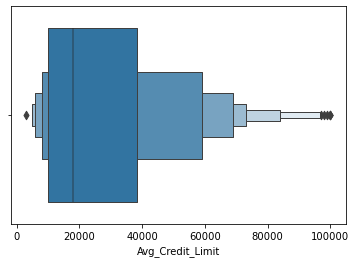

In [42]:
# The following line of code to plots boxplot.
sns.boxenplot(x='Avg_Credit_Limit', data=credit, orient='h')

Text(0.5, 1.0, 'Avg_Credit_Limit')

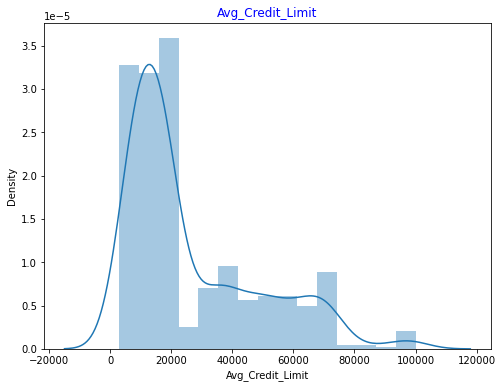

In [43]:
# The following line of code to plots distplot.
plt.figure(figsize=(8,6))
sns.distplot(credit['Avg_Credit_Limit']).set_title('Avg_Credit_Limit', color='blue')

<AxesSubplot:xlabel='Total_Credit_Cards'>

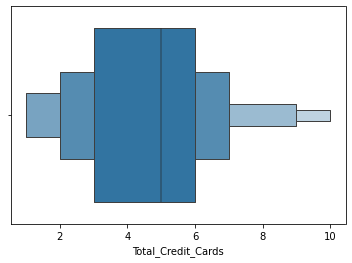

In [44]:
# The following line of code to plots boxplot.
sns.boxenplot(x='Total_Credit_Cards', data=credit, orient='h')

Text(0.5, 1.0, 'Total_Credit_Cards')

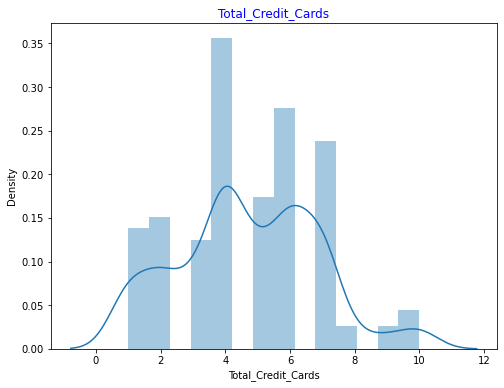

In [45]:
# The following line of code to plot distplot.
plt.figure(figsize=(8,6))
sns.distplot(credit['Total_Credit_Cards']).set_title('Total_Credit_Cards', color='blue')

<AxesSubplot:xlabel='Total_visits_bank'>

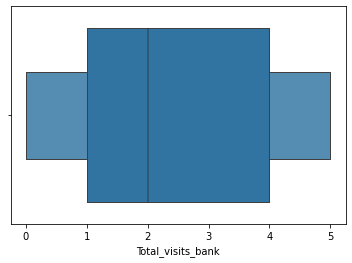

In [46]:
# The following line of code to plots boxplot.
sns.boxenplot(x='Total_visits_bank', data=credit, orient='h')

Text(0.5, 1.0, 'Total_visits_bank')

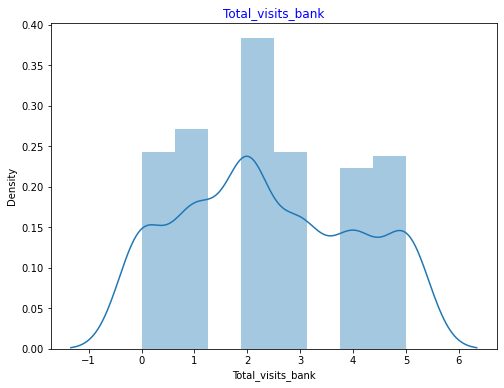

In [47]:
# The following line of code to plot distplot.
plt.figure(figsize=(8,6))
sns.distplot(credit['Total_visits_bank']).set_title('Total_visits_bank', color='blue')

<AxesSubplot:xlabel='Total_visits_online'>

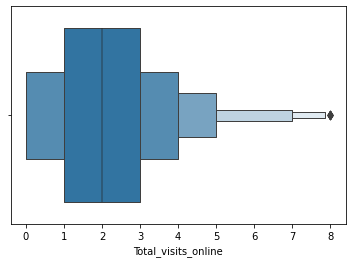

In [48]:
# The following line of code to plots boxplot.
sns.boxenplot(x='Total_visits_online', data=credit, orient='h')

Text(0.5, 1.0, 'Total_visits_online')

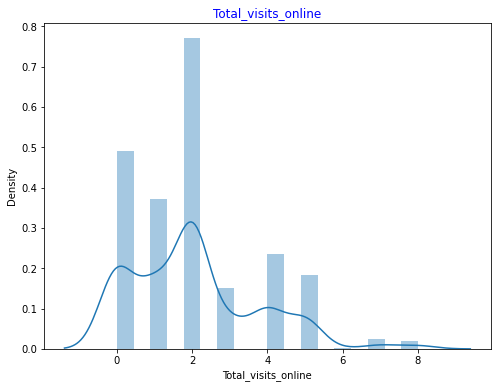

In [49]:
# The following line of code to plot distplot.
plt.figure(figsize=(8,6))
sns.distplot(credit['Total_visits_online']).set_title('Total_visits_online', color='blue')

<AxesSubplot:xlabel='Total_calls_made'>

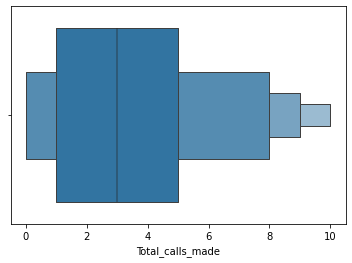

In [50]:
# The following line of code to plots boxplot.
sns.boxenplot(x='Total_calls_made', data=credit, orient='h')

Text(0.5, 1.0, 'Total_calls_made')

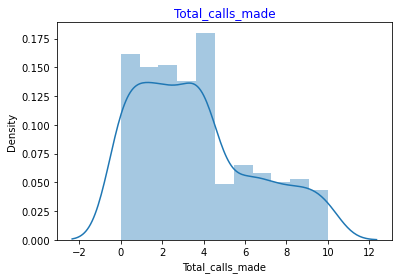

In [51]:
# The following line of code to plot distplot.
plt.figure(figsize=(6,4))
sns.distplot(credit['Total_calls_made']).set_title('Total_calls_made', color='blue')

In [53]:
credit['Avg_Credit_Limit'].value_counts()

18000    74
8000     35
6000     31
13000    28
9000     28
         ..
63000     2
25000     1
55000     1
3000      1
43000     1
Name: Avg_Credit_Limit, Length: 67, dtype: int64

# <a id='link5'>Checking for error, duplicates and missing vales.</a>

In [54]:
# Checking If there are any missing values in the dataset.
credit.isnull().values.any() 

False

In [55]:
# Checking If there are any null values in the dataset.
credit.isna().sum() 

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [56]:
# The following line of code to check nulls values.
credit.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [57]:
# The following code to check duplicates in the datasets.
dupes = credit.duplicated()
sum(dupes) 


0

In [58]:
credit['Avg_Credit_Limit'].isnull().value_counts()

False    660
Name: Avg_Credit_Limit, dtype: int64

# Observation.
No null, missing values, or duplicates values.

 # <a id='link7'>MultiVariate Analysis.</a>

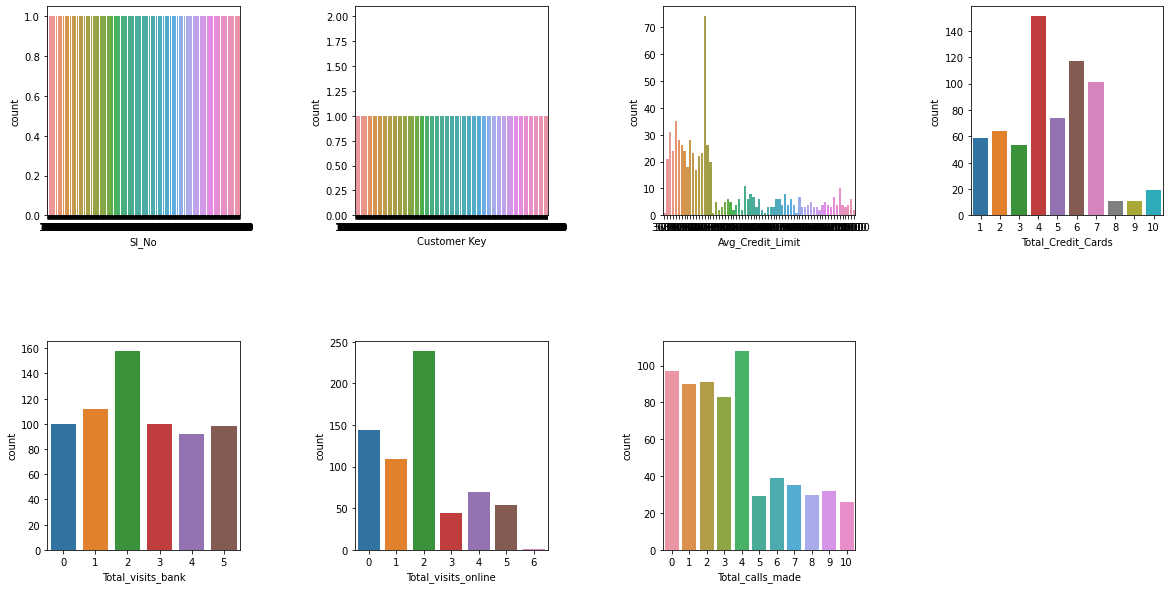

In [59]:
# The following line of code to analyze the distributions of perticular.
#attributes of continuous variables.
fig=plt.figure(figsize=(20,10))
fig.subplots_adjust(wspace=0.6,hspace=0.6)
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,4,i+1)
    sns.countplot(credit[col])

# <a id='link8'>Bi-variate analysis.</a>

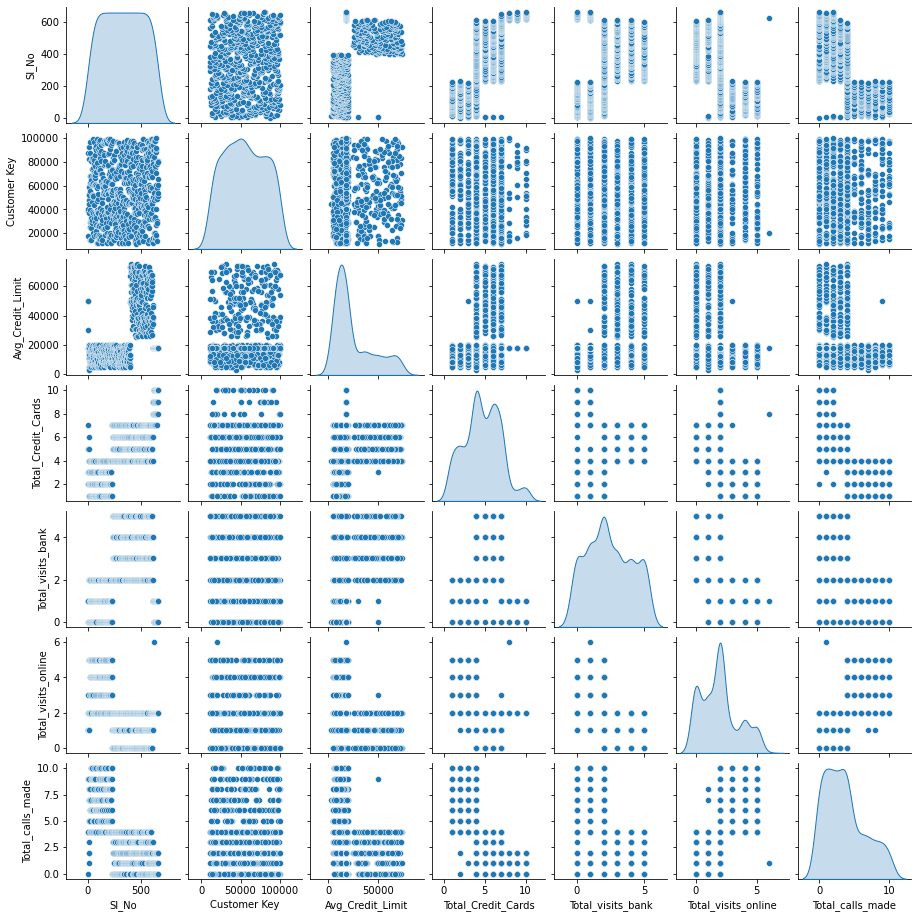

In [60]:
sns.pairplot(credit, palette= 'Dark1', diag_kind='kde',size=1.85) 

# Building The Model.

In [149]:
credit_df=credit.copy()

In [150]:
credit_df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


# Feature Scalling.

In [151]:
# The following line of code to drop customer key column.
scaled_df=credit_df.drop(['Sl_No','Customer Key'],axis = 1).apply(zscore)
scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


# <a id='link9'>K-Means Clustering.</a>

# K-Means.

Init controls the initialization technique. The standard version of the KMeans algorithm is implemented by setting init to 'random'. setting this to 'k-means++' employs an advanced trick to speed up convergence, which will be used later.
 
n_clusters sets k for the clustering step. This is the most important parameter for KMeans. n_init sets the number of initialization to perform.

This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten KMeans runs and return the results of the one with the lowest SSE.

Max_iter sets the number of maximum iterations for each initialization of the KMeans algorithm.

Text(0.5, 1.0, 'Selection k with the Elbow Method')

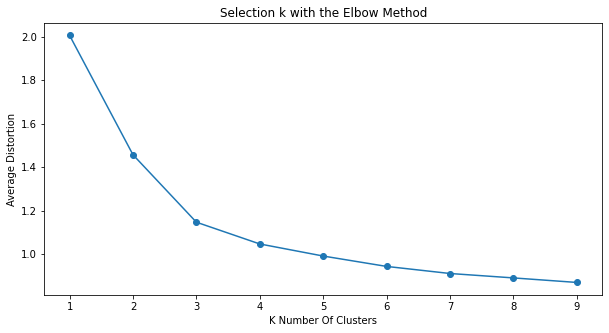

In [152]:
# The following line of code to find optimal no. of clusters.
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(scaled_df)
    prediction=model.predict(scaled_df)
    meanDistortions.append(sum(np.min(cdist(scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / credit
                           .shape[0])
    
plt.figure(figsize=(10,5))
plt.plot(clusters, meanDistortions, marker='o')
plt.xlabel('K Number Of Clusters')
plt.ylabel('Average Distortion')
plt.title('Selection k with the Elbow Method')

# Observation
From the above graph, it is clear that the score starts reducing when the number of clusters is 3 and the Elbow point starting 5 validating through inertia curve.

In [153]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42 )
kmeans.fit(scaled_df) #Replace the training dataset instead of x_train.
# The lowest SSE value.
print(kmeans.inertia_)
# Fainal location of the centroid.
print(kmeans.cluster_centers_)
# the number of iterations required to converge.
print(kmeans.n_iter_)
# First five predicted labels.
print(kmeans.labels_[:3])

933.0437490000533
[[-0.59579625 -1.05962278 -0.9015185   0.32299678  1.14810882]
 [ 2.83176409  1.86222621 -1.10576269  2.82731942 -0.87432983]
 [-0.02106178  0.37368962  0.6663945  -0.55367163 -0.55300488]]
5
[2 0 2]


In [154]:
# The following line of code to calculate the centroids for the columns to profile.
centroids = kmeans.cluster_centers_

In [155]:
# The following line of code to print the centroids.
display(centroids)

array([[-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983],
       [-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488]])

## Creating centroid dataframe.

Assigning the groups created above to data frame and study the characteristics for each group. an see the clusters for each customer.

In [156]:
# Creating a new dataframe only for labels and converting it to categorical variables.
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels.index = df_labels.index+1
df_labels['labels'] = df_labels['labels'].astype('category')
display(df_labels)

,labels
1,2
2,0
3,2
4,2
5,1
...,...
656,1
657,1
658,1
659,1


In [162]:
# Joining the label dataframe with the data frame.
df_labeled = scaled_df.join(df_labels)

2    386
0    224
1     50
Name: labels, dtype: int64


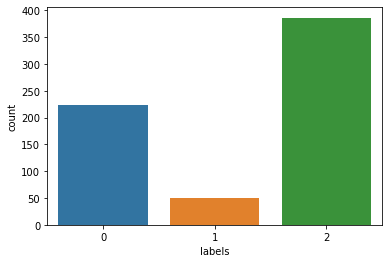

In [158]:
sns.countplot(df_labels['labels']);
print(df_labels['labels'].value_counts())

In [159]:
clust_df = df_labeled.drop(['Sl_No','Customer Key'],axis=1).groupby(['labels'])
clust_df.mean().round()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,12531.0,2.0,1.0,4.0,7.0
1,137347.0,9.0,1.0,10.0,1.0
2,34150.0,6.0,3.0,1.0,2.0


Analyze the distribution of the data among the four groups (K = 3). with the most informative visual tools is boxplot.

array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[labels]'>],
       [<AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[labels]'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

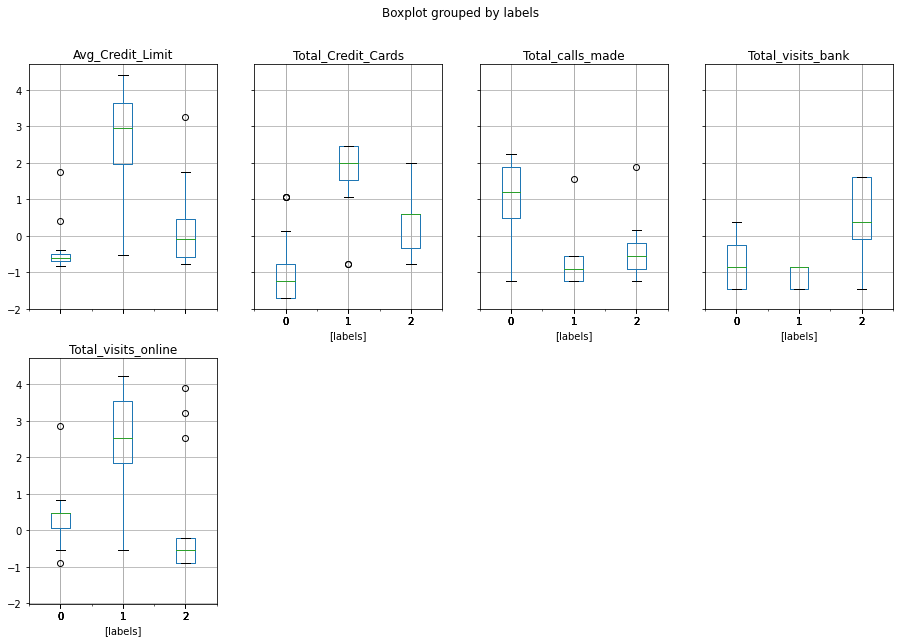

In [163]:
df_labeled.boxplot(by='labels', layout = (2,4),figsize=(15,10))

# Observation. 

The k-means algorithm is both more effective and more efficient with a small number of dimensions, that is, the number of features used to predict the right cluster for each customer. Hence The correlation coefficient above indicates that the relationship between Avg_Credit_Limit and Total_Credit_Cards can be considered moderate and positive. This means that we can see a clear  relationship between Avg_Credit_Limit and Total_Credit_Cards , although the relationship is not perfect. The fact that the correlation coefficient is positive, indicates that higher Avg_Credit_Limit and Total_Credit_Cards is associated with Total_visits_bank and Total_visits_online.The only positive correlation between the average credit limit is with total credit cards and total visits to the bank from the others have a negative correlation. 
 

In [164]:
# Let us try with K = 3 (to demonstrate the 3d plot using mplot3d)
from mpl_toolkits.mplot3d import Axes3D

In [165]:
scaled_df.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

The following line of codes will plot KMeans clustring (to demonstrate the 3D plot).


Text(0.5, 0.92, '3D plot of KMmeans Clustering')

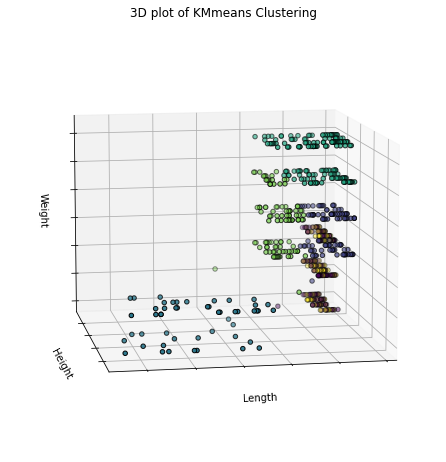

In [166]:
# The following line of code to plot 3D plot of kMeans clustring.

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=80)
k3_model=KMeans(6, random_state=2345)
k3_model.fit(scaled_df)
labels = k3_model.labels_
ax.scatter(scaled_df.iloc[:, 0], scaled_df.iloc[:, 1], scaled_df.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMmeans Clustering')


# <a id='link10'>Hierarchial Clustering.</a>

### Agglomerative Clustering 

In [36]:
df_ag = scaled_df.copy()

In [81]:
df_ag.head()

,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-1.729428,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,-1.724180,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,-1.718931,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-1.713683,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,-1.708434,1.740187,0.597334,-1.473731,3.202298,-0.203739


# Fitting Hierarchical Clustering to the credit card dataset.

Linkage method: single


array([[3.31000000e+02, 3.35000000e+02, 3.38853937e-02, 2.00000000e+00],
       [2.11000000e+02, 2.16000000e+02, 3.73651490e-02, 2.00000000e+00],
       [3.50000000e+01, 4.30000000e+01, 4.97044967e-02, 2.00000000e+00],
       ...,
       [0.00000000e+00, 1.31500000e+03, 2.41326935e+00, 6.10000000e+02],
       [1.31200000e+03, 1.31600000e+03, 2.73003852e+00, 6.58000000e+02],
       [1.25500000e+03, 1.31700000e+03, 3.08921011e+00, 6.60000000e+02]])

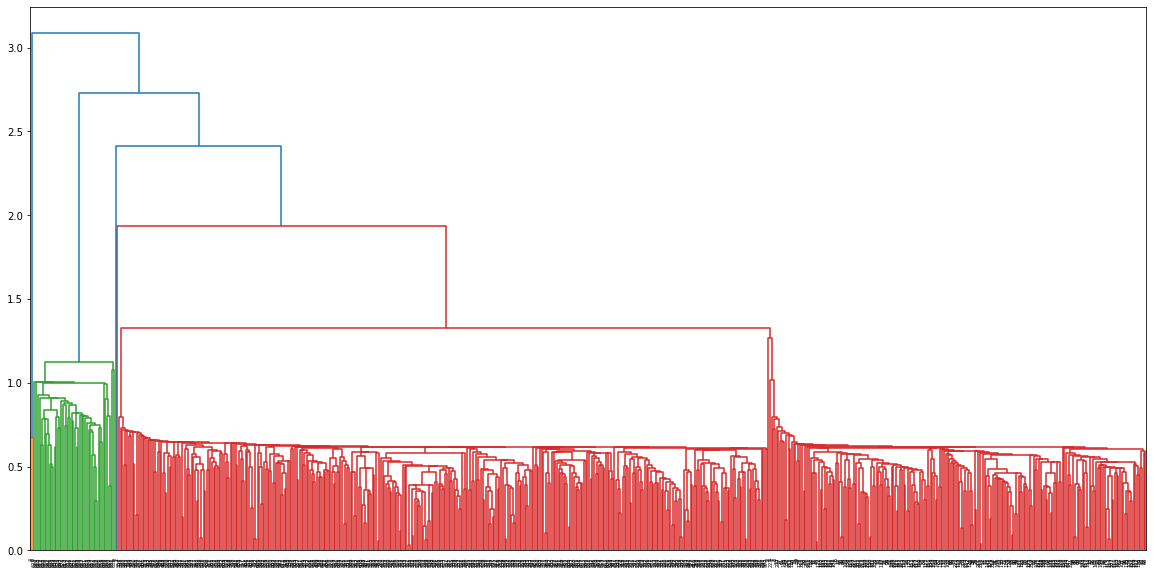

Linkage method: complete


array([[3.31000000e+02, 3.35000000e+02, 3.38853937e-02, 2.00000000e+00],
       [2.11000000e+02, 2.16000000e+02, 3.73651490e-02, 2.00000000e+00],
       [3.50000000e+01, 4.30000000e+01, 4.97044967e-02, 2.00000000e+00],
       ...,
       [1.30900000e+03, 1.31500000e+03, 5.66746221e+00, 2.28000000e+02],
       [1.31200000e+03, 1.31600000e+03, 6.74000579e+00, 6.12000000e+02],
       [1.31400000e+03, 1.31700000e+03, 8.87569097e+00, 6.60000000e+02]])

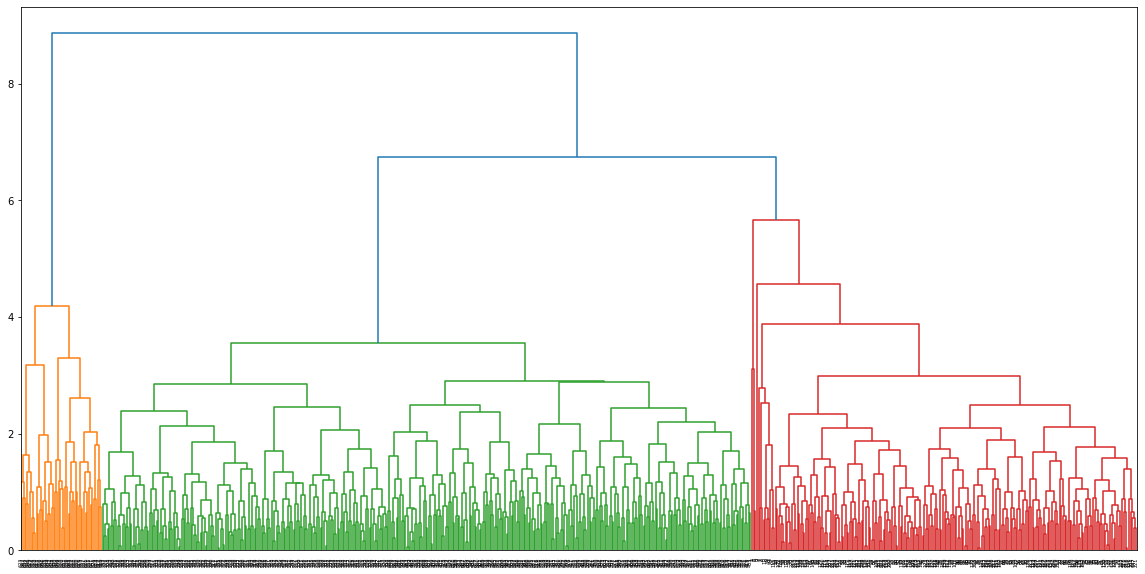

Linkage method: average


array([[3.31000000e+02, 3.35000000e+02, 3.38853937e-02, 2.00000000e+00],
       [2.11000000e+02, 2.16000000e+02, 3.73651490e-02, 2.00000000e+00],
       [3.50000000e+01, 4.30000000e+01, 4.97044967e-02, 2.00000000e+00],
       ...,
       [1.30900000e+03, 1.31500000e+03, 3.82055448e+00, 6.10000000e+02],
       [1.05000000e+03, 1.31200000e+03, 4.16743824e+00, 5.00000000e+01],
       [1.31600000e+03, 1.31700000e+03, 6.04330629e+00, 6.60000000e+02]])

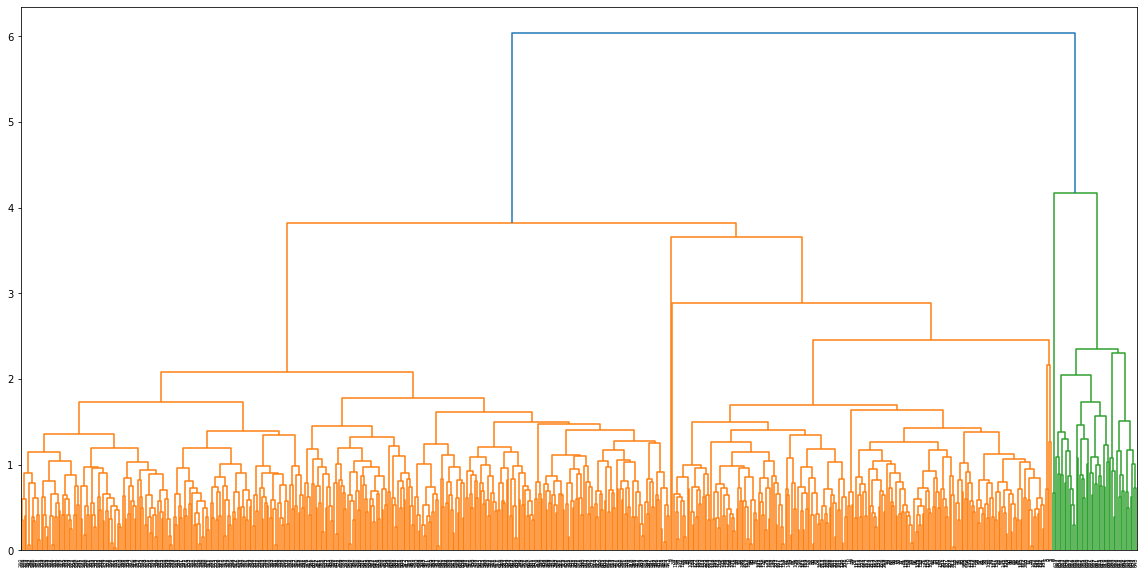

Linkage method: ward


array([[3.31000000e+02, 3.35000000e+02, 3.38853937e-02, 2.00000000e+00],
       [2.11000000e+02, 2.16000000e+02, 3.73651490e-02, 2.00000000e+00],
       [3.50000000e+01, 4.30000000e+01, 4.97044967e-02, 2.00000000e+00],
       ...,
       [1.31300000e+03, 1.31400000e+03, 1.96458350e+01, 3.84000000e+02],
       [1.31200000e+03, 1.31600000e+03, 5.16151210e+01, 4.34000000e+02],
       [1.31500000e+03, 1.31700000e+03, 5.95904248e+01, 6.60000000e+02]])

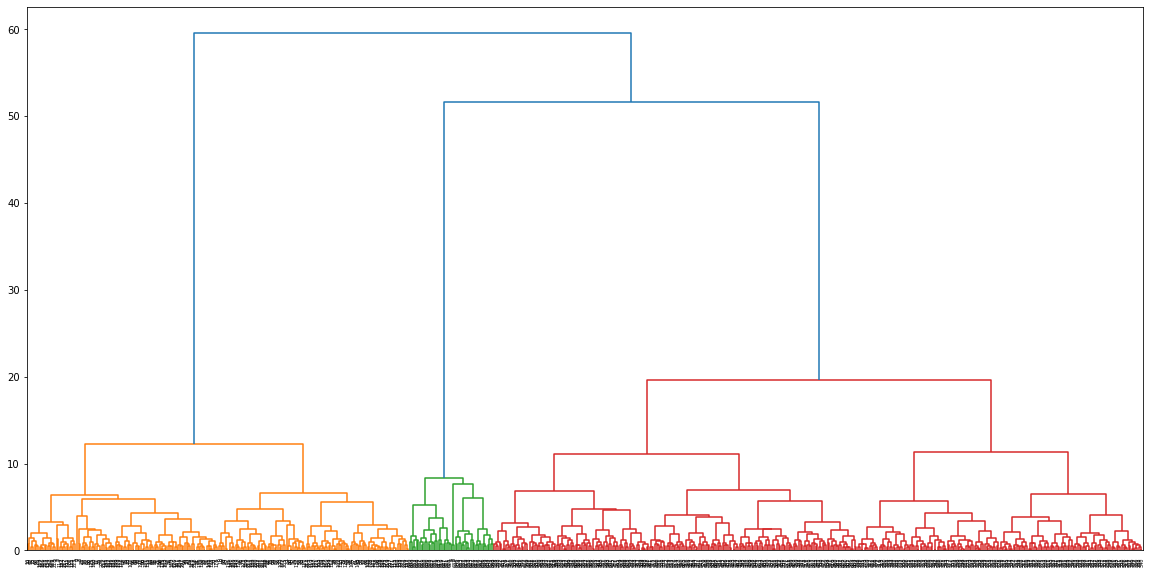

In [75]:
from scipy.cluster.hierarchy import linkage,cophenet,dendrogram
# The following line of code for linkage matrix & dendrogram.
for i in ['single','complete','average','ward']:
    Z = linkage(scaled_df,method=i, metric='euclidean')
    print('Linkage method:',i)
    display(Z[:])
    plt.figure(figsize=(20, 10))
    dendrogram(Z)
    plt.show()

In [79]:
# Cophenet index is a measure of the correlation between the distance of points in feature space and the didtance on dendrogram
# Closer it is to 1, the better is the cluster.
Z = linkage(df_ag, metric='euclidean', method='average')
c, coph_dists = cophenet(Z, pdist(df_ag))

c

0.905290055540969

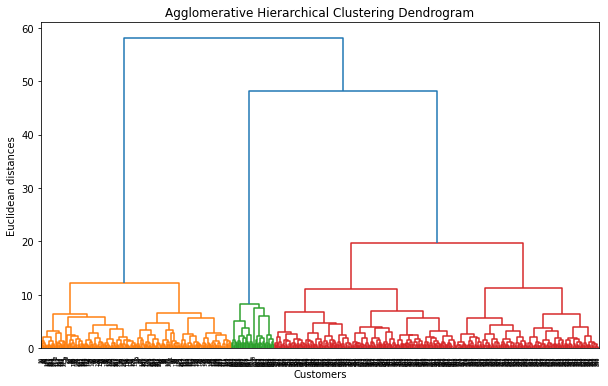

In [78]:
plt.figure(figsize=(10,6))
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df_ag, method = 'ward'))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [76]:
# Cophenet index is a measure of the correlation between the distance of points in feature space and the didtance on dendrogram
# Closer it is to 1, the better is the cluster.
Z = linkage(df_ag, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z, pdist(df_ag))

c

0.7571185018058815

### Comparing the KMeans Clustering with Hierarchical Clusters. 

# Observation.

the results on above of both the clustring are almost the similar to the same dataset. These two techniques have some differences also. Below the comparison between KMeans and Hierarchical Clustering algorithms based on above implementation.

### KMeans Clustring.

In order to implement the KMeans clustering, we need to find the optimal number of in which the customers will be placed.

* Category it is centroid based, partition-based.
* Method to find the optimal number of clusters by the Elbow method ussing (WCSS).
* Directional approach not any, the only centroid is considered to form the clusters.

### Advantages:
* Convergence is guaranteed.
* Specialized to clusters of different sizes and shapes.

### Disadvantages:
* K- Value is difficult to predict.
* Didn't work well with global cluster.



### Hierarchical Clustering.
Hierarchical methods can be either divisive or agglomerative, in hierarchical clustring can stop at any number of cluster, one find appropriate by interprating the dendrogram. Agglomerative methods begin with 'n' clusters and sequentially combine similar clusters until only one cluster is obtained.

* Category is Hierarchical, Agglomerative.
* Method to find the optimal number of clusters by Dendrogram.
* Directional approach, Top-down, bottom-up. 

### Advantages:
* Ease of handling of any forms of similarity or distance.
* Consequently, applicability to any attribute's types.

### Disadvantages:
* Hierarchical clustering requires the computation and storage of an n×n distance matrix. For very large datasets, this can be expensive and slow.


# <a id='link12'>Silhouette Coefficient.</a>

In [48]:
from sklearn import metrics

In [49]:
from sklearn.metrics import silhouette_score

In [50]:
# The following line of code to create range of clusters.
range_n_clusters = list(range(0,12))
print(range_n_clusters)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [52]:
# The following line of codes to calculate Sc for k = 3 through k = 12
k_range = range(3,12)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(scaled_df)
    scores.append(metrics.silhouette_score(scaled_df, km.labels_))

In [53]:
scores

[0.5498302328899118,
 0.38698301839760263,
 0.2787705639950684,
 0.25795941827175256,
 0.26331785884312997,
 0.25193234559722427,
 0.23378615862676771,
 0.21804336850067962,
 0.21367168884843252]

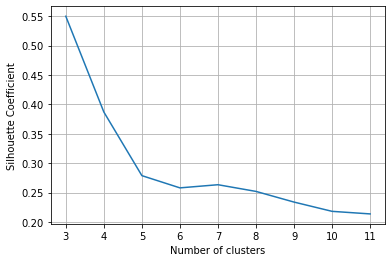

In [54]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)


# <a id='link11'>Principal Component Analysis (PCA).</a>


To reduce dimensionality, I’ve used Principal Component Analysis (PCA) — a method which identifies variables that are responsible for most of the variance in the data by transforming a large set of variables into a smaller one that still contains most of the information in the large.

In [55]:
covMatrix = np.cov(scaled_df,rowvar=False)
print(covMatrix)

[[ 1.00151745  0.67899048  0.74045091  0.40705522  0.03396783 -0.68516356
  -0.16344073]
 [ 0.67899048  1.00151745  0.60978441 -0.10046453  0.55222122 -0.41498065
   0.23138131]
 [ 0.74045091  0.60978441  1.00151745  0.31627526  0.16801286 -0.65223974
  -0.07717981]
 [ 0.40705522 -0.10046453  0.31627526  1.00151745 -0.55269882 -0.50678371
  -0.47777025]
 [ 0.03396783  0.55222122  0.16801286 -0.55269882  1.00151745  0.12749255
   0.53767698]
 [-0.68516356 -0.41498065 -0.65223974 -0.50678371  0.12749255  1.00151745
   0.25589891]
 [-0.16344073  0.23138131 -0.07717981 -0.47777025  0.53767698  0.25589891
   0.40208764]]


In [57]:
pca = PCA(n_components=3)
pca.fit(scaled_df)

PCA(n_components=3)

In [58]:
print(pca.explained_variance_)

[3.10339421 2.20218488 0.33210454]


In [59]:
print(pca.components_)

[[ 0.52255489  0.38616565  0.49561062  0.29430947  0.01529803 -0.48349961
  -0.10751105]
 [ 0.03581205  0.43340091  0.10593837 -0.49202926  0.62731697  0.12838048
   0.38413185]
 [-0.5243142  -0.38526203  0.26823131 -0.05485747  0.29106169 -0.64099579
   0.07821695]]


In [60]:
print(pca.explained_variance_ratio_)

[0.48405882 0.34349069 0.05180074]


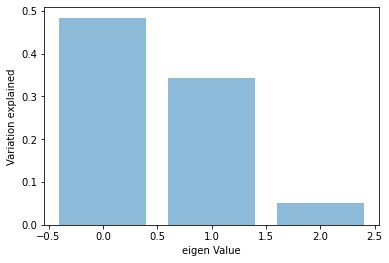

In [62]:
plt.bar(list(range(0,3)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

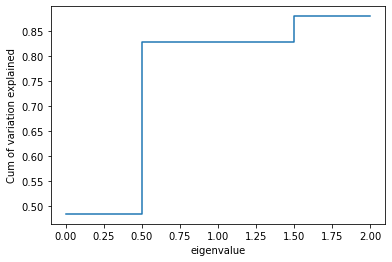

In [63]:
plt.step(list(range(0,3)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigenvalue')
plt.show()

# Dimensionality Reduction.

In [66]:
pca3 = PCA(n_components=3)
pca3.fit(scaled_df)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(scaled_df)

[[ 0.52255489  0.38616565  0.49561062  0.29430947  0.01529803 -0.48349961
  -0.10751105]
 [ 0.03581205  0.43340091  0.10593837 -0.49202926  0.62731697  0.12838048
   0.38413185]
 [-0.5243142  -0.38526203  0.26823131 -0.05485747  0.29106169 -0.64099579
   0.07821695]]
[0.48405882 0.34349069 0.05180074]


In [67]:
Xpca3

array([[-0.56175354,  0.67356169,  0.63091637],
       [-2.49716735,  2.77619376,  0.17606737],
       [-0.59091064,  0.94913476,  1.05982842],
       ...,
       [ 2.84050655,  3.74896481, -0.24717393],
       [ 3.77831811,  5.39644409,  0.5402513 ],
       [ 2.96703221,  5.03998078, -0.24686434]])

In [68]:
Xpca3.shape

(660, 3)

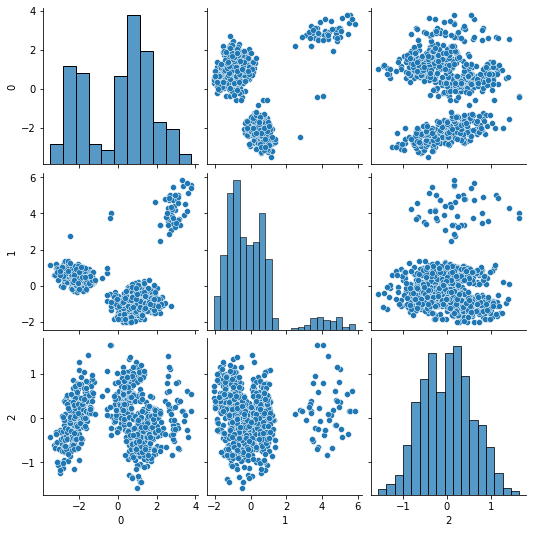

In [69]:
sns.pairplot(pd.DataFrame(Xpca3))

# <a id='link13'>Conclusion.</a>


In this case study project about credit card customer segmentation, I have analyzed the customer segmentation by using different unsupervised machine learning algorithms and techniques to predict the best clustering technique. I have used KMeans clustering and Hierarchical Clustering both techniques have advantages and disadvantages as I have mentioned above in the comprising part. I have compared these two techniques and measure the scores of the clusters. The KMeans clustering is one of the most popular algorithms and usually, the first thing practitioners apply when solving clustering tasks to get an idea of the structure of the dataset. I have created 3 clusters as per the elbow method value result from each cluster has different behavior and different scores, overall the scores are almost close to each other with all clusters. with the 

# <a id='link14'>References & GitHub Link.</a>


* https://builtin.com/data-science/step-step-explanation-principal-component-analysis.

* https://www.geeksforgeeks.org/difference-between-k-means-and-hierarchical-clustering/

* https://towardsdatascience.com/clustering-based-unsupervised-learning-8d705298ae51

* https://scikit-learn.org/stable/modules/clustering.html

* https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_clustering_algorithms_hierarchical.htm#:~:text=Hierarchical%20clustering%20is%20another%20unsupervised,falls%20into%20following%20two%20categories.&text=The%20hierarchy%20of%20the%20clusters,a%20dendrogram%20or%20tree%20structure.

# GitHub Link.
https://github.com/command20/This-repository-records-all-the-project-works-that-I-did-in-my-PGP-AIML-program-with-UT-Austin-and-G